In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# User Interaction

In [3]:
df_interaction = pd.read_csv('../datasets/fashion/customer_interactions.csv')
df_interaction

,customer_id,page_views,time_spent
0,1,194,460
1,2,163,1023
2,3,252,1075
3,4,279,1542
4,5,151,667
...,...,...,...
95,96,109,319
96,97,89,621
97,98,360,869
98,99,167,876


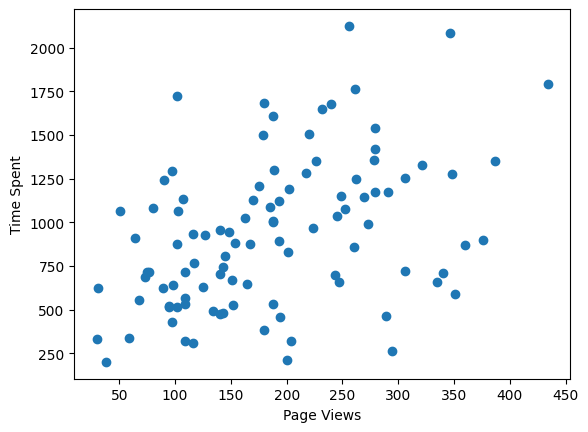

In [4]:
plt.scatter(df_interaction['page_views'], df_interaction['time_spent'])
plt.xlabel('Page Views')
plt.ylabel('Time Spent')
plt.show()

# Product Detials

In [54]:
df_product = pd.read_csv('../datasets/fashion/product_details.csv', sep=';')
df_product = df_product.loc[:, ~df_product.columns.str.contains('^Unnamed')]
df_product

,product_id,ratings,price,category,brand,kind
0,0,3.270463,53.916667,Dress,Adidas,Kids' Fashion
1,1,2.879264,44.500000,Dress,Adidas,Men's Fashion
2,2,2.673620,47.666667,Dress,Adidas,Women's Fashion
3,3,3.689981,50.200000,Dress,Gucci,Kids' Fashion
4,4,3.282323,51.125000,Dress,Gucci,Men's Fashion
...,...,...,...,...,...,...
70,70,2.436425,56.500000,T-shirt,Nike,Men's Fashion
71,71,2.636504,72.166667,T-shirt,Nike,Women's Fashion
72,72,3.548573,65.750000,T-shirt,Zara,Kids' Fashion
73,73,2.520955,52.818182,T-shirt,Zara,Men's Fashion


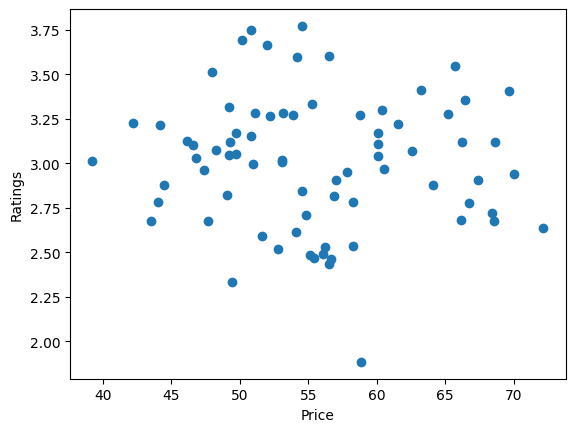

In [6]:
plt.scatter(df_product['price'], df_product['ratings'])
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.show()

# Purchase History

In [7]:
df_history = pd.read_csv('../datasets/fashion/purchase_history.csv', sep=';')
df_history = df_history.loc[:, ~df_history.columns.str.contains('^Unnamed')]
df_history

,customer_id,product_id,purchase_date
0,19,1,NaN
1,97,38,NaN
2,25,2,NaN
3,57,43,NaN
4,79,61,NaN
...,...,...,...
995,20,44,NaN
996,42,54,NaN
997,9,58,NaN
998,8,74,NaN


# Exploratory Data Analysis

In [9]:
df_product.head()

,product_id,ratings,price,category,brand,kind
0,0,3.270463,53.916667,Dress,Adidas,Kids' Fashion
1,1,2.879264,44.500000,Dress,Adidas,Men's Fashion
2,2,2.673620,47.666667,Dress,Adidas,Women's Fashion
3,3,3.689981,50.200000,Dress,Gucci,Kids' Fashion
4,4,3.282323,51.125000,Dress,Gucci,Men's Fashion


In [40]:
df_product_purchase = pd.merge(
    left=df_history,
    right=df_product,
    on=['product_id'],
)
df_product_purchase

,customer_id,product_id,purchase_date,ratings,price,category,brand,kind,metrics
0,19,1,NaN,2.879264,44.500000,Dress,Adidas,Men's Fashion,"[min, mean, max, count]"
1,97,38,NaN,3.405079,69.636364,Shoes,H&M,Women's Fashion,"[min, mean, max, count]"
2,25,2,NaN,2.673620,47.666667,Dress,Adidas,Women's Fashion,"[min, mean, max, count]"
3,57,43,NaN,2.468021,55.388889,Shoes,Zara,Men's Fashion,"[min, mean, max, count]"
4,79,61,NaN,2.784215,58.294118,T-shirt,Adidas,Men's Fashion,"[min, mean, max, count]"
...,...,...,...,...,...,...,...,...,...
995,20,44,NaN,2.333109,49.466667,Shoes,Zara,Women's Fashion,"[min, mean, max, count]"
996,42,54,NaN,2.823598,49.100000,Sweater,Nike,Kids' Fashion,"[min, mean, max, count]"
997,9,58,NaN,3.077396,48.250000,Sweater,Zara,Men's Fashion,"[min, mean, max, count]"
998,8,74,NaN,2.908798,67.375000,T-shirt,Zara,Women's Fashion,"[min, mean, max, count]"


In [44]:
df_product_performance = df_product_purchase.groupby(
    by='category'
).agg(
    {'customer_id': 'count', 'ratings': 'mean', 'price': 'mean'}
).reset_index().rename(
    columns={'customer_id': 'purchased'}
).melt(
    id_vars=["category"], 
    var_name="metrics", 
    value_name="value",
).sort_values(by=['category'])
df_product_performance

,category,metrics,value
0,Dress,purchased,176.000000
5,Dress,ratings,3.015601
10,Dress,price,53.289773
1,Jeans,purchased,231.000000
6,Jeans,ratings,2.974159
11,Jeans,price,56.696970
2,Shoes,purchased,222.000000
7,Shoes,ratings,2.903501
12,Shoes,price,56.738739
3,Sweater,purchased,170.000000


In [24]:
df_product.groupby(by=['category']).agg({'product_id': 'sum', 'ratings': 'mean', 'price': 'mean'})

,product_id,ratings,price
category,,,
Dress,105,3.010919,53.163005
Jeans,330,2.968111,57.209428
Shoes,555,2.928352,56.663136
Sweater,780,3.177982,54.516164
T-shirt,1005,2.944939,56.454005


In [29]:
df_product.groupby(by=['category'])['ratings'].describe().reset_index().transpose().reset_index()

,index,0,1,2,3,4
0,category,Dress,Jeans,Shoes,Sweater,T-shirt
1,count,15.0,15.0,15.0,15.0,15.0
2,mean,3.010919,2.968111,2.928352,3.177982,2.944939
3,std,0.427643,0.34067,0.371128,0.303617,0.374135
4,min,1.884276,2.461879,2.333109,2.775702,2.436425
5,25%,2.860553,2.692217,2.609199,2.999475,2.654908
6,50%,3.071304,2.998502,2.959646,3.120295,2.965708
7,75%,3.271694,3.215187,3.274624,3.26315,3.086697
8,max,3.689981,3.596602,3.413228,3.750342,3.771673


## Likelyhood user interaction to purchase a product

In [8]:
df_user_purchase = df_history.groupby(by=['customer_id']).agg({'product_id': 'count'}).reset_index().rename(columns={'product_id': 'purchased_items'})

df_a = pd.merge(
    left=df_interaction,
    right=df_user_purchase,
    on=['customer_id'],
)
df_a

,customer_id,page_views,time_spent,purchased_items
0,1,76.180559,715.632261,9
1,2,135.711554,1047.330660,9
2,3,82.700736,747.054566,11
3,4,216.917338,940.321136,12
4,5,117.082613,543.919926,8
...,...,...,...,...
95,96,98.894857,579.659756,6
96,97,160.869834,972.985162,9
97,98,245.408514,1873.464434,14
98,99,197.346790,357.087043,8


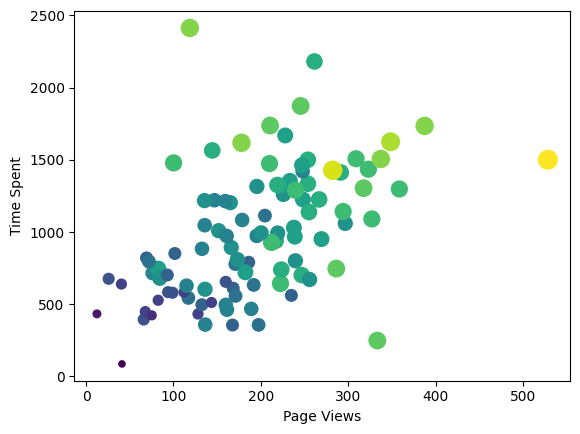

In [19]:
plt.scatter(df_a['page_views'], df_a['time_spent'], s=df_a['purchased_items'] * 10, c=df_a['purchased_items'])
plt.xlabel('Page Views')
plt.ylabel('Time Spent')
plt.show()

## Graph

In [107]:
from d3graph import d3graph, vec2adjmat

In [149]:
df_purchase = pd.merge(
    df_product,
    df_history,
    on=['product_id'],
)

# Brand level
# df_purchase['category'] = df_purchase['category'].astype(str) + '_' + df_purchase['brand'].astype(str)

df_purchase = df_purchase.groupby(by=['customer_id', 'category']).agg(
    {'product_id': 'count'}
).reset_index().rename(columns={'product_id': 'purchased'})
df_purchase


,customer_id,category,purchased
0,1,Dress,2
1,1,Shoes,2
2,1,Sweater,2
3,1,T-shirt,3
4,2,Jeans,4
...,...,...,...
416,100,Dress,3
417,100,Jeans,3
418,100,Shoes,2
419,100,Sweater,4


In [150]:
def build_graph_database(df):
    df['source'] = df['category']
    df['source_total'] = df['purchased']
    df['target'] = df.apply(lambda row: df['category'].values.tolist(), axis=1)
    df['target_total'] = df.apply(lambda row: df['source_total'].values.tolist(), axis=1)
    df = df.explode(column=['target', 'target_total'])
    df['source_target'] = df.apply(lambda row: sorted([row['source'], row['target']]), axis=1)
    df = df.drop_duplicates(subset='source_target')
    df = df[df['source'] != df['target']]
    df['weight'] = df['source_total'] + df['target_total']
    df = df[['source', 'target', 'weight']]
    return df

build_graph_database(df_purchase[df_purchase['customer_id'] == 1])

/var/folders/n2/9hl8ftpn3j379grs52lt_3q80000gn/T/ipykernel_90009/399243268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source'] = df['category']
/var/folders/n2/9hl8ftpn3j379grs52lt_3q80000gn/T/ipykernel_90009/399243268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source_total'] = df['purchased']
/var/folders/n2/9hl8ftpn3j379grs52lt_3q80000gn/T/ipykernel_90009/399243268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,source,target,weight
0,Dress,Shoes,4
0,Dress,Sweater,4
0,Dress,T-shirt,5
1,Shoes,Sweater,4
1,Shoes,T-shirt,5
2,Sweater,T-shirt,5


In [151]:
df_graph = df_purchase.groupby(by=['customer_id']).apply(lambda df: build_graph_database(df)).reset_index(drop=True)
df_graph = df_graph.groupby(by=['source', 'target']).agg({'weight': 'sum'}).reset_index()
df_graph

/var/folders/n2/9hl8ftpn3j379grs52lt_3q80000gn/T/ipykernel_90009/1584603899.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_graph = df_purchase.groupby(by=['customer_id']).apply(lambda df: build_graph_database(df)).reset_index(drop=True)


,source,target,weight
0,Dress,Jeans,358
1,Dress,Shoes,332
2,Dress,Sweater,280
3,Dress,T-shirt,302
4,Jeans,Shoes,396
5,Jeans,Sweater,341
6,Jeans,T-shirt,382
7,Shoes,Sweater,318
8,Shoes,T-shirt,358
9,Sweater,T-shirt,296


In [152]:
# Convert to adjacency matrix
adjmat = vec2adjmat(
    df_graph['source'].tolist(), 
    df_graph['target'].tolist(), 
    weight=df_graph['weight'].tolist()
)

# Draw graph database
d3 = d3graph()
d3.graph(adjmat)
# d3.show(filepath='../models/graph/brand.html')
d3.show(filepath='../models/graph/category.html')

[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[d3graph] INFO> Number of unique nodes: 5
[d3graph] INFO> Slider range is set to [279, 396]
[d3graph] INFO> Write to path: [/Users/syahrul/Personal/ML-Projects/skilvul/technical-test/models/graph/category.html]
[d3graph] INFO> File already exists and will be overwritten: [/Users/syahrul/Personal/ML-Projects/skilvul/technical-test/models/graph/category.html]
